In [1]:
#loading data
from sklearn.datasets import load_iris
import numpy as np
data = load_iris().data
labels = load_iris().target
#reshape labels since data is a 2d array
labels = np.reshape(labels,(150,1))
data = np.concatenate([data,labels],axis=-1)

In [3]:
#create pandas df
import pandas as pd
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.DataFrame(data,columns=names)
#add a good name for the targer
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

In [6]:
dataset.describe()
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


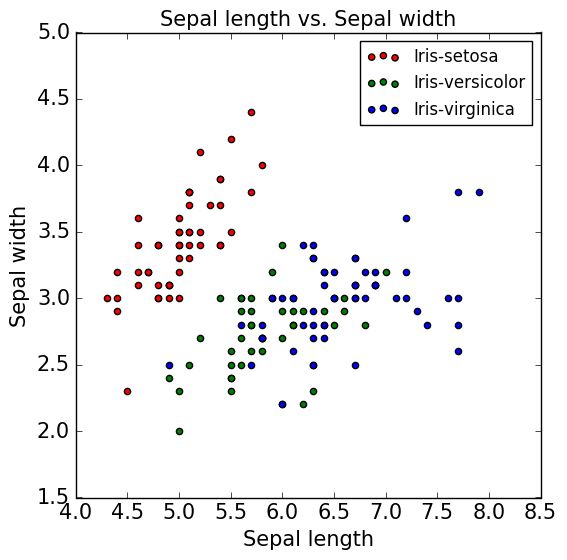

In [47]:
#plot the first two feature for the dataset
import matplotlib.pyplot as plt
plt.figure(4, figsize=(6, 6))
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']=='Iris-setosa')],np.asarray(dataset['sepal-width'])[np.where(dataset['species']=='Iris-setosa')], c='r', label='Iris-setosa')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']=='Iris-versicolor')],np.asarray(dataset['sepal-width'])[np.where(dataset['species']=='Iris-versicolor')], c='g', label='Iris-versicolor')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']=='Iris-virginica')],np.asarray(dataset['sepal-width'])[np.where(dataset['species']=='Iris-virginica')], c='b', label='Iris-virginica')
plt.xlabel('Sepal length',fontsize=15)
plt.ylabel('Sepal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Sepal length vs. Sepal width',fontsize=15)
plt.legend(prop={'size': 12})
plt.show()
plt.show()

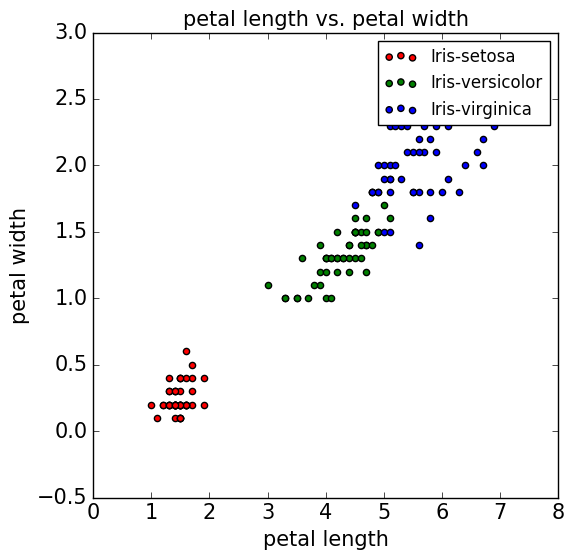

In [48]:
import matplotlib.pyplot as plt
plt.figure(4, figsize=(6, 6))
plt.scatter(np.asarray(dataset['petal-length'])[np.where(dataset['species']=='Iris-setosa')],np.asarray(dataset['petal-width'])[np.where(dataset['species']=='Iris-setosa')], c='r', label='Iris-setosa')
plt.scatter(np.asarray(dataset['petal-length'])[np.where(dataset['species']=='Iris-versicolor')],np.asarray(dataset['petal-width'])[np.where(dataset['species']=='Iris-versicolor')], c='g', label='Iris-versicolor')
plt.scatter(np.asarray(dataset['petal-length'])[np.where(dataset['species']=='Iris-virginica')],np.asarray(dataset['petal-width'])[np.where(dataset['species']=='Iris-virginica')], c='b', label='Iris-virginica')
plt.xlabel('petal length',fontsize=15)
plt.ylabel('petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('petal length vs. petal width',fontsize=15)
plt.legend(prop={'size': 12})
plt.show()
plt.show()


In [59]:
#correlation matrix between two variables
#iloc accesses a position just with one index
dataset.iloc[:,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [83]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3],dataset['species'], test_size=0.2, random_state=42)
train_data.shape,train_label.shape,test_data.shape,test_label.shape


((120, 3), (120,), (30, 3), (30,))

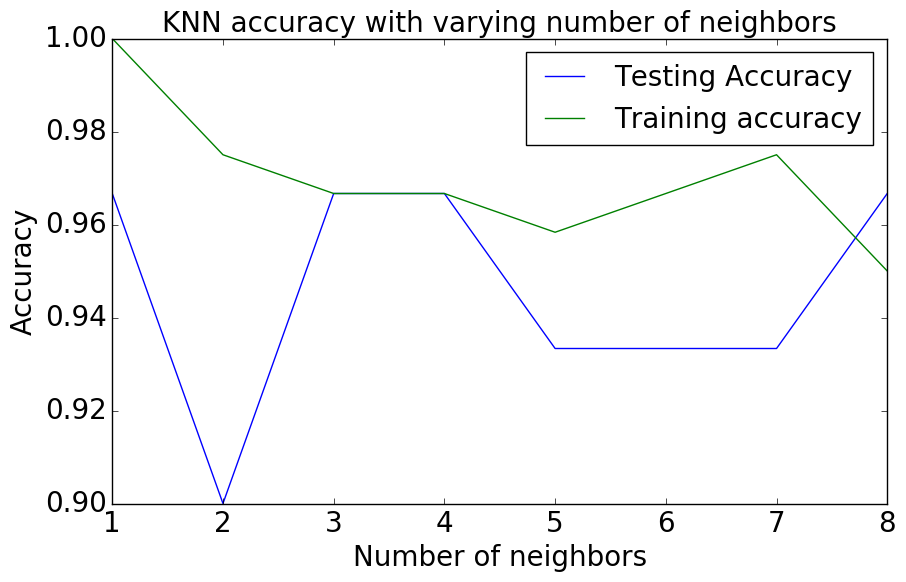

In [85]:
#k-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier


#choose the correct number of neighbors with cross valiedation
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)
#pick best k-value
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [86]:
#train for 3-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

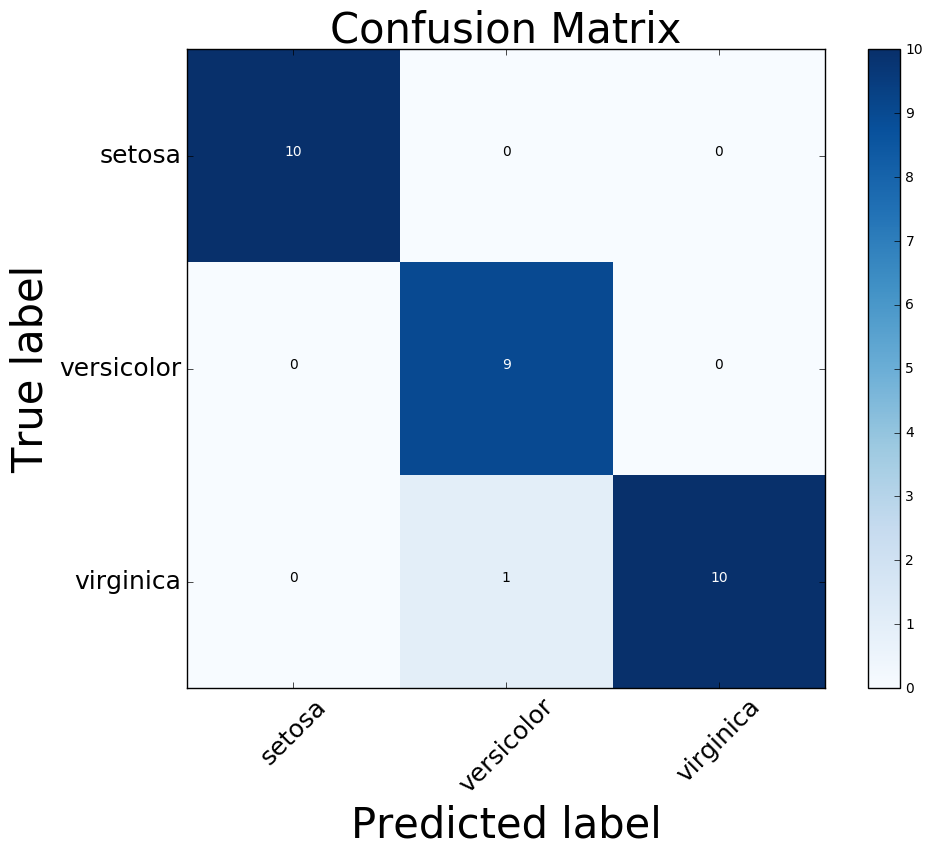

In [90]:
#plot confusion matrix
prediction = knn.predict(test_data)

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [91]:
from sklearn.metrics import classification_report
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

    avg / total       0.97      0.97      0.97        30

